Numerical Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [14]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [15]:
x['age_imputed'] = x['Age']
x['fare_imputed'] = x['Fare']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [17]:
x_train

,Age,Fare,age_imputed,fare_imputed
331,45.5,28.5000,45.5,28.5000
733,23.0,13.0000,23.0,13.0000
382,32.0,7.9250,32.0,7.9250
704,26.0,7.8542,26.0,7.8542
813,6.0,31.2750,6.0,31.2750
...,...,...,...,...
106,21.0,7.6500,21.0,7.6500
270,NaN,31.0000,NaN,31.0000
860,41.0,14.1083,41.0,14.1083
435,14.0,120.0000,14.0,120.0000


In [19]:
x_train['age_imputed'][x_train['age_imputed'].isnull()] = x_train['Age'].dropna().sample(
    x_train['Age'].isnull().sum(), random_state = 42).values

C:\Users\saqli\AppData\Local\Temp\ipykernel_18076\1707240636.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['age_imputed'][x_train['age_imputed'].isnull()] = x_train['Age'].dropna().sample(


In [21]:
x_train.isnull().mean()*100

Age             19.662921
Fare             0.000000
age_imputed      0.000000
fare_imputed     0.000000
dtype: float64

C:\Users\saqli\AppData\Local\Temp\ipykernel_18076\974213273.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'], hist = False)
C:\Users\saqli\AppData\Local\Temp\ipykernel_18076\974213273.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['age_imputed'], 

<Axes: xlabel='age_imputed', ylabel='Density'>

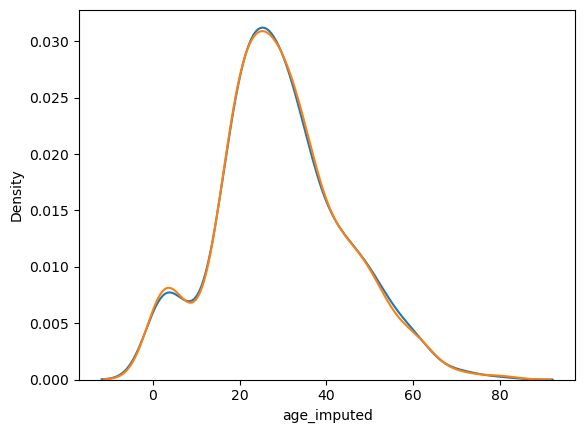

In [25]:
sns.distplot(x_train['Age'], hist = False)
sns.distplot(x_train['age_imputed'], hist = False)

In [30]:
print('Original variable variance: ', x_train['Age'].var())
print('Variance after random imputation: ', x_train['age_imputed'].var())

Original variable variance:  210.2517072477438
Variance after random imputation:  210.47357118159263


In [29]:
x_train[['Fare', 'Age', 'age_imputed']].cov()

,Fare,Age,age_imputed
Fare,2700.831981,71.580633,54.857635
Age,71.580633,210.251707,210.251707
age_imputed,54.857635,210.251707,210.473571


<Axes: >

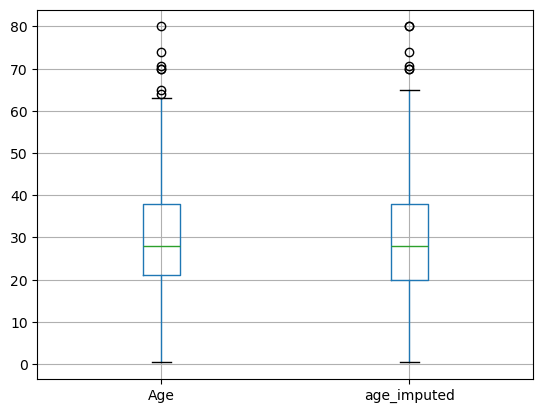

In [32]:
x_train[['Age', 'age_imputed']].boxplot()

For Categorical Data

In [41]:
data = pd.read_csv('housing_data.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [42]:
data

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [43]:
data['fireplacequ_imputed'] = data['FireplaceQu']
data['garagequal_imputed'] = data['GarageQual']

In [44]:
x = data
y = data['SalePrice']

In [49]:
x.sample(5)

,FireplaceQu,GarageQual,SalePrice,fireplacequ_imputed,garagequal_imputed
203,Gd,TA,149000,Gd,TA
40,TA,TA,160000,TA,TA
895,TA,TA,140000,TA,TA
50,NaN,TA,177000,TA,TA
1307,NaN,TA,138000,Po,TA


In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [51]:
x_train['fireplacequ_imputed'][x_train['fireplacequ_imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_train['fireplacequ_imputed'].isnull().sum(), random_state = 42).values

C:\Users\saqli\AppData\Local\Temp\ipykernel_18076\1607380919.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['fireplacequ_imputed'][x_train['fireplacequ_imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_train['firepl

In [52]:
x_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,fireplacequ_imputed,garagequal_imputed
304,Ex,TA,295000,Ex,TA
901,NaN,TA,153000,Gd,TA
1322,TA,TA,190000,TA,TA
1181,Gd,TA,392500,Gd,TA
821,NaN,TA,93000,Gd,TA


In [54]:
x_train['FireplaceQu'].value_counts() / len(x_train['FireplaceQu'].dropna())

FireplaceQu
Gd    0.491143
TA    0.405797
Fa    0.043478
Ex    0.033816
Po    0.025765
Name: count, dtype: float64

In [55]:
x_train['fireplacequ_imputed'].value_counts() / len(x_train)

fireplacequ_imputed
Gd    0.491438
TA    0.405822
Fa    0.042808
Ex    0.033390
Po    0.026541
Name: count, dtype: float64

In [59]:
temp = pd.concat([
    x_train['FireplaceQu'].value_counts() / len(x_train['FireplaceQu'].dropna()),
    x_train['fireplacequ_imputed'].value_counts() / len(x_train)
], axis = 1)

In [60]:
temp

,count,count
Gd,0.491143,0.491438
TA,0.405797,0.405822
Fa,0.043478,0.042808
Ex,0.033816,0.033390
Po,0.025765,0.026541


In [63]:
temp.columns = ['original', 'imputed']

In [64]:
temp

,original,imputed
Gd,0.491143,0.491438
TA,0.405797,0.405822
Fa,0.043478,0.042808
Ex,0.033816,0.033390
Po,0.025765,0.026541


C:\Users\saqli\AppData\Local\Temp\ipykernel_18076\3332337875.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'], hist = False)
C:\Users\saqli\AppData\Local\Temp\ipykernel_18076\3332337875.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

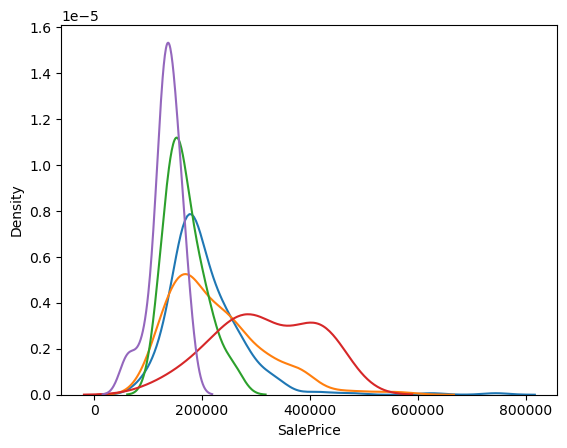

In [66]:
for category in data['FireplaceQu'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'], hist = False)

C:\Users\saqli\AppData\Local\Temp\ipykernel_18076\629229741.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['fireplacequ_imputed'] == category]['SalePrice'], hist = False)
C:\Users\saqli\AppData\Local\Temp\ipykernel_18076\629229741.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63727

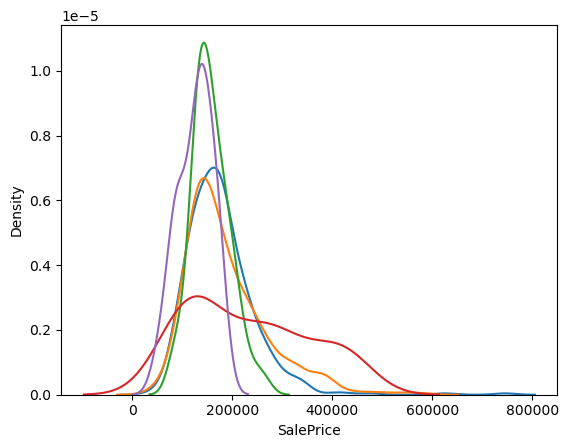

In [67]:
for category in data['fireplacequ_imputed'].dropna().unique():
    sns.distplot(x_train[x_train['fireplacequ_imputed'] == category]['SalePrice'], hist = False)

Missing Indicator

In [68]:
from sklearn.impute import SimpleImputer, MissingIndicator

In [69]:
df_new = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [70]:
df_new.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [71]:
x_new = df_new.drop(columns=['Survived'])
y_new = df_new['Survived']

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.2, random_state = 42)

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
si = SimpleImputer()

In [88]:
si = SimpleImputer()
X_train_trf = si.fit_transform(x_train)
X_test_trf = si.transform(x_test)

In [90]:
clf = LogisticRegression()

clf.fit(X_train_trf,y_train)

y_pred = clf.predict(X_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6480446927374302

In [91]:
mi = MissingIndicator()

In [96]:
mi.fit(x_train)

MissingIndicator()

In [97]:
mi.features_

array([0], dtype=int64)

In [99]:
X_train_missing = mi.transform(x_train)

In [100]:
X_train_missing

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [102]:
X_test_missing = mi.transform(x_test)

In [104]:
x_train['Age_NA'] = X_train_missing

In [110]:
x_test['Age_NA'] = X_test_missing

In [111]:
si = SimpleImputer()

X_train_trf2 = si.fit_transform(x_train)
X_test_trf2 = si.transform(x_test)

In [112]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6368715083798883

In [113]:
si = SimpleImputer(add_indicator=True)

In [115]:
X_train = si.fit_transform(x_train)

In [116]:
X_test = si.transform(x_test)

In [117]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6368715083798883